<a href="https://colab.research.google.com/github/rchahal2501/barbershop-tensorflow/blob/main/cut_nocut_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [66]:
img = image.load_img("/content/drive/MyDrive/0000_basedata/basedata/train/happy/1.png")

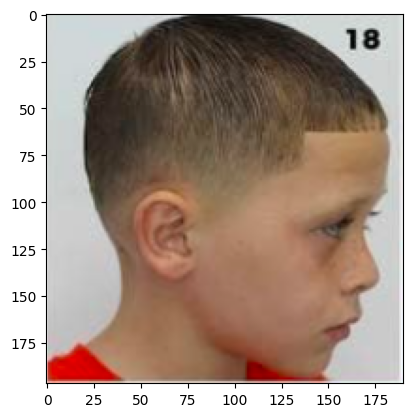

In [67]:
plt.imshow(img)

In [68]:
cv2.imread("/content/drive/MyDrive/0000_basedata/basedata/train/happy/1.png").shape

(197, 190, 3)

In [69]:
#cv2.imread("/content/drive/MyDrive/0000_basedata/basedata/train/happy/1.png")

In [70]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)
testn= ImageDataGenerator(rescale = 1/255)

In [71]:
train_dataset= train.flow_from_directory(directory='/content/drive/MyDrive/0000_basedata/basedata/train',
                                         target_size=(200,200),
                                         color_mode ="rgb",
                                         batch_size= 3,
                                         classes=('happy','not_happy'),
                                         class_mode='binary')

validation_dataset= validation.flow_from_directory(directory='/content/drive/MyDrive/0000_basedata/basedata/validation',
                                         target_size=(200,200),
                                         color_mode ="rgb",
                                         batch_size= 3,
                                         classes=('happy','not_happy'),
                                         class_mode='binary')

test_dataset = testn.flow_from_directory('/content/drive/MyDrive/0000_basedata/basedata/test',
                                         target_size=(200,200),
                                         color_mode ="rgb",
                                         batch_size= 1,
                                         class_mode= None
)

Found 25 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [72]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [73]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [74]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [75]:
model.compile(loss= 'binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
)

In [76]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs =20,
                      validation_data = validation_dataset
                      #validation_steps= 5
                      )

Epoch 1/20
5/5 [==============================] - 5s 818ms/step - loss: 2.5997 - accuracy: 0.3846 - val_loss: 1.0503 - val_accuracy: 0.3571
Epoch 2/20
5/5 [==============================] - 5s 1s/step - loss: 0.8195 - accuracy: 0.4667 - val_loss: 0.6959 - val_accuracy: 0.3571
Epoch 3/20
5/5 [==============================] - 3s 681ms/step - loss: 0.6890 - accuracy: 0.5333 - val_loss: 0.7002 - val_accuracy: 0.3571
Epoch 4/20
5/5 [==============================] - 4s 965ms/step - loss: 0.7255 - accuracy: 0.3846 - val_loss: 0.6560 - val_accuracy: 0.6429
Epoch 5/20
5/5 [==============================] - 4s 767ms/step - loss: 0.6777 - accuracy: 0.6923 - val_loss: 0.7146 - val_accuracy: 0.3571
Epoch 6/20
5/5 [==============================] - 4s 850ms/step - loss: 0.6817 - accuracy: 0.4667 - val_loss: 0.6701 - val_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 5s 1s/step - loss: 0.6696 - accuracy: 0.6154 - val_loss: 0.6667 - val_accuracy: 0.7500
Epoch 8/20
5/5 [==========

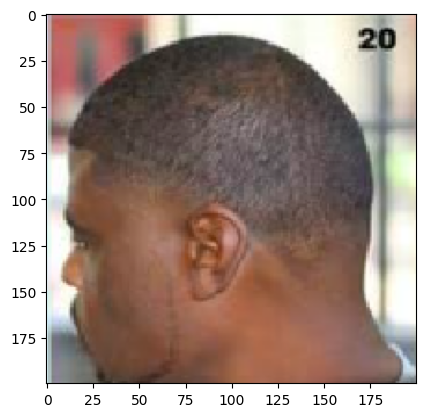

1/1 [==============================] - 0s 105ms/step
Barber may need a visit.


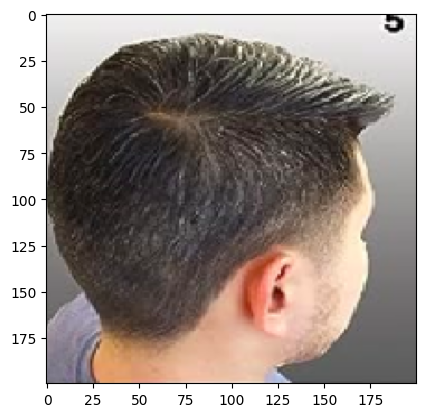

1/1 [==============================] - 0s 45ms/step
Barber may need a visit.


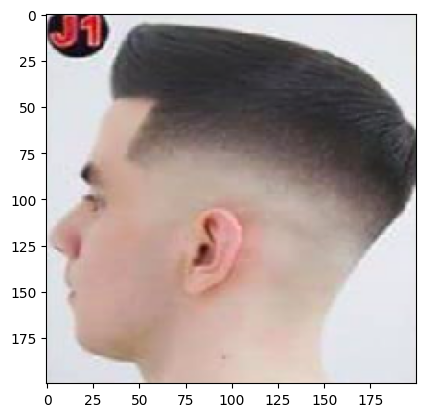

1/1 [==============================] - 0s 43ms/step
That's a clean cut!


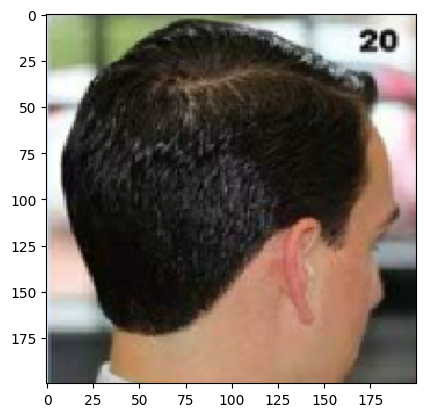

1/1 [==============================] - 0s 48ms/step
Barber may need a visit.


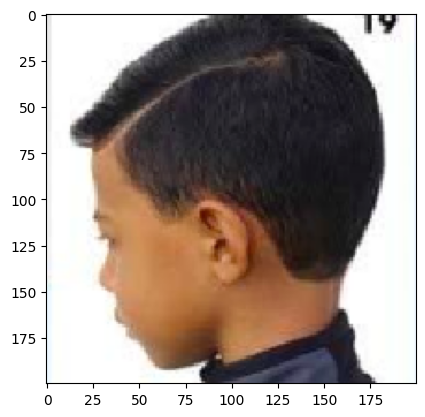

1/1 [==============================] - 0s 42ms/step
Barber may need a visit.


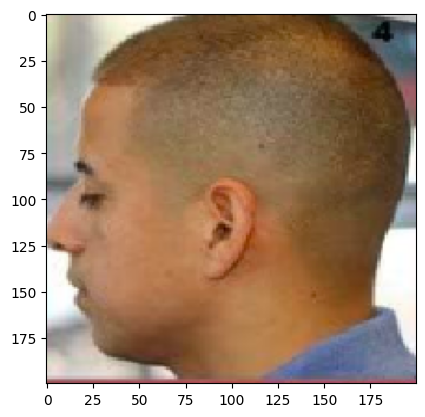

1/1 [==============================] - 0s 45ms/step
That's a clean cut!


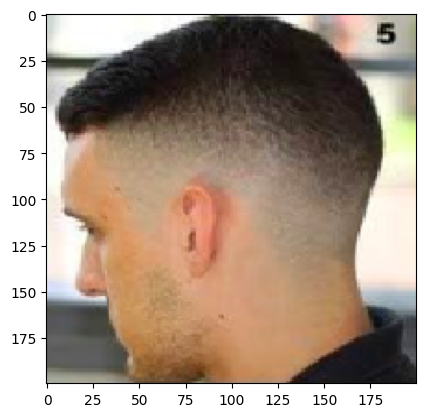

1/1 [==============================] - 0s 46ms/step
That's a clean cut!


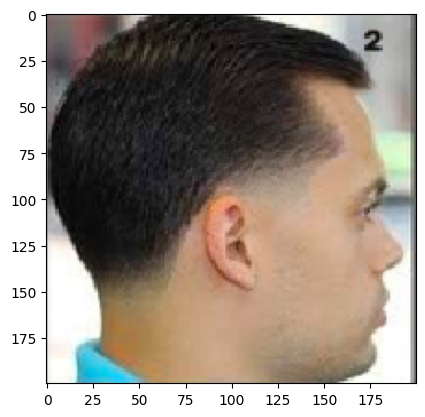

1/1 [==============================] - 0s 44ms/step
Barber may need a visit.


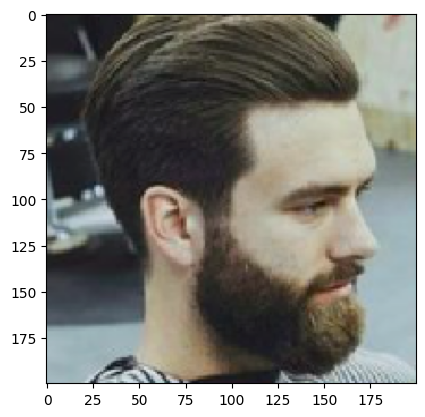

1/1 [==============================] - 0s 80ms/step
Barber may need a visit.


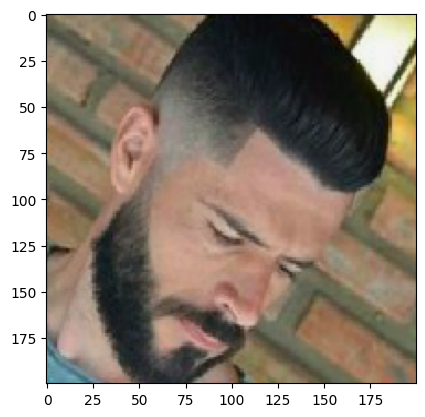

1/1 [==============================] - 0s 87ms/step
That's a clean cut!


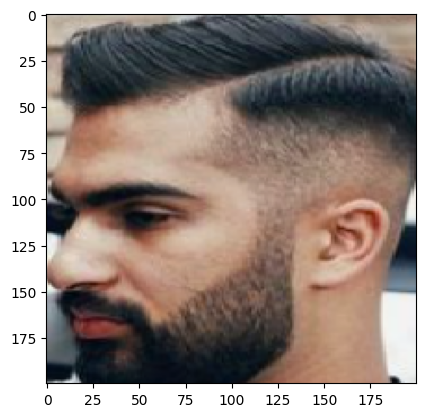

1/1 [==============================] - 0s 93ms/step
That's a clean cut!


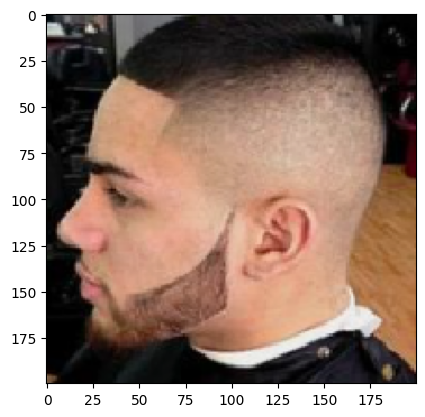

1/1 [==============================] - 0s 66ms/step
That's a clean cut!


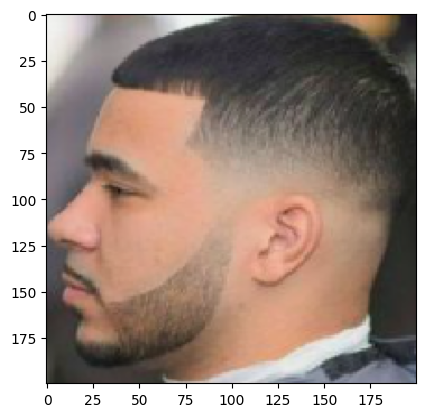

1/1 [==============================] - 0s 60ms/step
That's a clean cut!


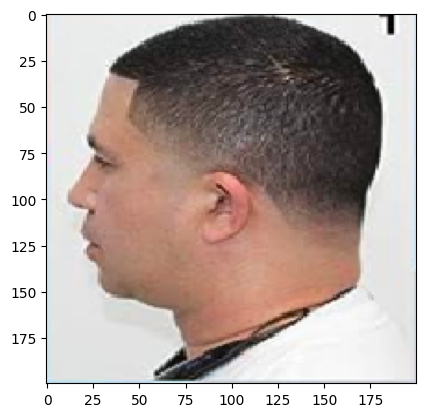

1/1 [==============================] - 0s 66ms/step
Barber may need a visit.


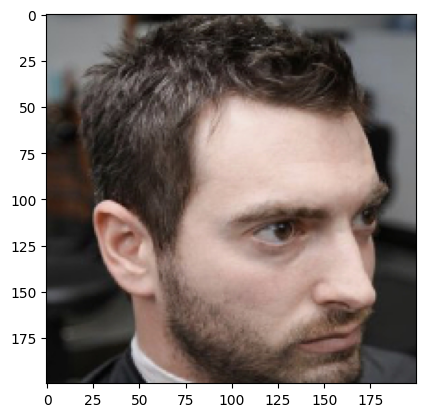

1/1 [==============================] - 0s 67ms/step
That's a clean cut!


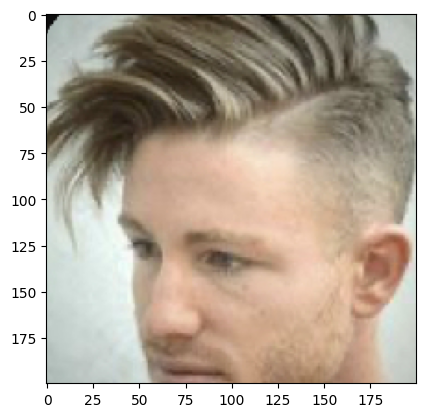

1/1 [==============================] - 0s 95ms/step
That's a clean cut!


In [77]:
dir_path_test = '/content/drive/MyDrive/0000_basedata/basedata/test'

for i in os.listdir(dir_path_test):
  img = image.load_img(dir_path_test+'//'+ i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis= 0)
  images= np.vstack([X])
  val = model.predict(images)

  if (val == 0):
    print("That's a clean cut!")
  else:
    print("Barber may need a visit.")

In [78]:
#train_dataset.class_indices